<a href="https://colab.research.google.com/github/FajriAditiyaPutra/Orbit-Ventura/blob/main/Regresi%20Linier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all library needed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Save Data to DataFrame
! wget -O 50_CrimeR.csv https://www.sheffield.ac.uk/polopoly_fs/1.937192!/file/Crime_R.csv

--2022-03-15 09:24:28--  https://www.sheffield.ac.uk/polopoly_fs/1.937192!/file/Crime_R.csv
Resolving www.sheffield.ac.uk (www.sheffield.ac.uk)... 143.167.2.102
Connecting to www.sheffield.ac.uk (www.sheffield.ac.uk)|143.167.2.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4881 (4.8K) [text/csv]
Saving to: ‘50_CrimeR.csv’

50_CrimeR.csv       100%[===================>]   4.77K  --.-KB/s    in 0s      

2022-03-15 09:24:30 (414 MB/s) - ‘50_CrimeR.csv’ saved [4881/4881]



In [ ]:
reglin = pd.read_csv('50_CrimeR.csv')
reglin.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [ ]:
reglin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CrimeRate            47 non-null     float64
 1   Youth                47 non-null     int64  
 2   Southern             47 non-null     int64  
 3   Education            47 non-null     float64
 4   ExpenditureYear0     47 non-null     int64  
 5   LabourForce          47 non-null     int64  
 6   Males                47 non-null     int64  
 7   MoreMales            47 non-null     int64  
 8   StateSize            47 non-null     int64  
 9   YouthUnemployment    47 non-null     int64  
 10  MatureUnemployment   47 non-null     int64  
 11  HighYouthUnemploy    47 non-null     int64  
 12  Wage                 47 non-null     int64  
 13  BelowWage            47 non-null     int64  
 14  CrimeRate10          47 non-null     float64
 15  Youth10              47 non-null     int64

In [ ]:
reglin.corr()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
CrimeRate,1.000000,-0.055002,-0.053465,0.157005,0.646211,0.169309,0.157113,0.141546,0.307945,-0.050613,...,0.629700,0.138849,0.163331,0.125157,0.303974,-0.038185,0.165357,-0.281453,0.436740,-0.076246
Youth,-0.055002,1.000000,0.584355,-0.404477,-0.505737,-0.160949,-0.028680,-0.048581,-0.280638,-0.224381,...,-0.513173,-0.073214,0.059896,0.005249,-0.282565,-0.201452,-0.244174,-0.097341,-0.615583,0.633203
Southern,-0.053465,0.584355,1.000000,-0.496831,-0.372636,-0.505469,-0.314733,-0.349630,-0.049918,-0.172419,...,-0.376168,-0.478050,-0.329930,-0.263777,-0.054286,-0.186064,0.071269,-0.317315,-0.615912,0.751462
Education,0.157005,-0.404477,-0.496831,1.000000,0.300018,0.427860,0.272360,0.057403,-0.001403,-0.026598,...,0.318456,0.427725,0.173557,-0.056985,-0.000550,0.009220,-0.171931,0.233205,0.485811,-0.623747
ExpenditureYear0,0.646211,-0.505737,-0.372636,0.300018,1.000000,0.121493,0.033760,0.036784,0.526284,-0.043698,...,0.993586,0.047956,-0.003897,-0.012378,0.531186,-0.038003,0.135443,-0.157784,0.787296,-0.538800
LabourForce,0.169309,-0.160949,-0.505469,0.427860,0.121493,1.000000,0.513559,0.366911,-0.123672,-0.229400,...,0.106350,0.974818,0.474179,0.286188,-0.125571,-0.200756,-0.347803,0.198845,0.272300,-0.254833
Males,0.157113,-0.028680,-0.314733,0.272360,0.033760,0.513559,1.000000,0.836195,-0.410628,0.351892,...,0.022843,0.535478,0.882966,0.745046,-0.408964,0.373205,0.035302,0.247763,0.177925,-0.161323
MoreMales,0.141546,-0.048581,-0.349630,0.057403,0.036784,0.366911,0.836195,1.000000,-0.351102,0.429861,...,0.040843,0.385071,0.796917,0.936117,-0.346462,0.431853,0.082788,0.260228,0.106842,-0.105233
StateSize,0.307945,-0.280638,-0.049918,-0.001403,0.526284,-0.123672,-0.410628,-0.351102,1.000000,-0.038120,...,0.513789,-0.175913,-0.378248,-0.342549,0.999371,-0.020832,0.201788,-0.143571,0.308716,-0.060654
YouthUnemployment,-0.050613,-0.224381,-0.172419,-0.026598,-0.043698,-0.229400,0.351892,0.429861,-0.038120,1.000000,...,-0.051712,-0.237177,0.321949,0.449803,-0.040807,0.991235,0.726123,0.061028,0.012540,-0.087397


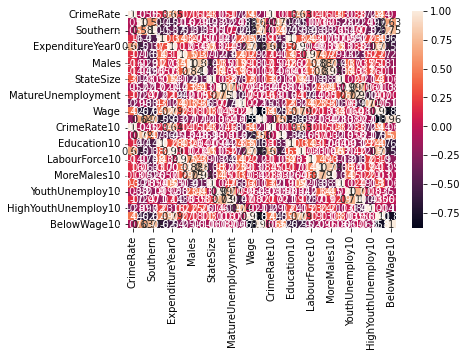

In [ ]:
#Atau Jika menggunakan heatmap
sns.heatmap(reglin.corr(), annot=True)

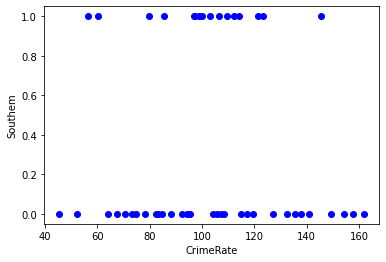

In [ ]:
plt.scatter(reglin['CrimeRate'], reglin['Southern'], color='blue')
plt.xlabel("CrimeRate")
plt.ylabel("Southem")
plt.show()

In [ ]:
features = ['CrimeRate', 'Southern']
X = reglin[features].values
Y = reglin.Southern

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


hasil uji kolmogorov 
 KstestResult(statistic=0.40529127036719576, pvalue=5.273739748344499e-06)


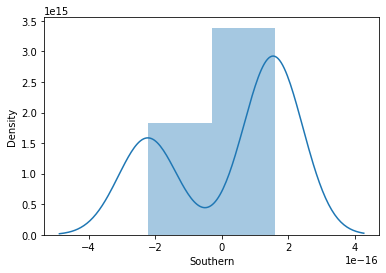

In [ ]:
y_predtrain= lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm', )
print('hasil uji kolmogorov \n', norm_er)

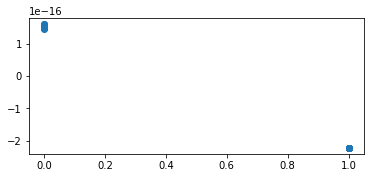

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_predtrain, err)

In [ ]:
vif = [variance_inflation_factor(X_train, i) for i in range(len(X_train.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features).T

,CrimeRate,Southern
VIF,1.470959,1.470959


In [ ]:
X_constant = sm.add_constant(X_train)                #Ingat lagi x1 = R&D, x2 =  Marketing
linreg = sm.OLS(Y_train,X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Southern   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.177e+31
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:37:15   Log-Likelihood:                 1264.4
No. Observations:                  37   AIC:                            -2523.
Df Residuals:                      34   BIC:                            -2518.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.053e-16   2.21e-16      1.381      0.176   -1.44e-16    7.55e-16
x1          -3.93e-18   2.04e-18     -1.929      0.062   -8.07e-18    2.09e-19
x2             1.0000   1.25e-16   7.97e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        8.546   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.820
Skew:                           0.297   Prob(JB):                        0.244
Kurtosis:                       1.785   Cond. No.                         396.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Type Your Code Here
y_predtest = lin_reg.predict(X_test)

#MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSE Data Training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE Data Training = ', MSE_test)

#RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE Data Training = ', RMSE_train)
RMSE_test = np.sqrt(MSE_train)
print('Nilai RMSE Data Testing = ', RMSE_train)

#MAE
MAE_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE Data Training = ', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('Nilai MAE Data Testing = ', MAE_test)

Nilai MSE Data Training =  3.2737481595861865e-32
Nilai MSE Data Training =  3.122893441355446e-32
Nilai RMSE Data Training =  1.809350203688105e-16
Nilai RMSE Data Testing =  1.809350203688105e-16
Nilai MAE Data Training =  1.7797671125240187e-16
Nilai MAE Data Testing =  1.738543521007316e-16


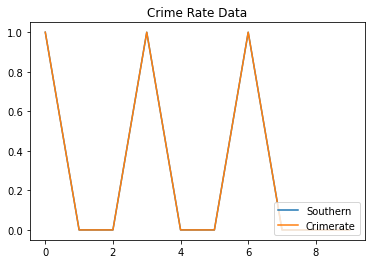

In [ ]:
plt.plot(y_predtest)
plt.plot(Y_test.values)
plt.title('Crime Rate Data')
plt.legend(labels=['Southern', 'Crimerate'], loc = 'lower right')

In [ ]:
print(f'R^2 score: {lin_reg.score(X, Y)}')

R^2 score: 1.0


In [ ]:
linreg.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Southern   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.177e+31
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:42:31   Log-Likelihood:                 1264.4
No. Observations:                  37   AIC:                            -2523.
Df Residuals:                      34   BIC:                            -2518.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.053e-16   2.21e-16      1.381      0.176   -1.44e-16    7.55e-16
x1          -3.93e-18   2.04e-18     -1.929      0.062   -8.07e-18    2.09e-19
x2             1.0000   1.25e-16   7.97e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        8.546   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.820
Skew:                           0.297   Prob(JB):                        0.244
Kurtosis:                       1.785   Cond. No.                         396.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Lasso_reg = Lasso(alpha=0.1).fit(X_train, Y_train)
y_predtrain_lasso = Lasso_reg.predict(X_train)
y_predtest_lasso = Lasso_reg.predict(X_test)

Ridge_reg = Ridge(alpha=0.1).fit(X_train, Y_train)
y_predtrain_ridge = Ridge_reg.predict(X_train)
y_predtest_ridge = Ridge_reg.predict(X_test)

Sup_reg = SVR().fit(X_train, Y_train)
y_predtrain_svr = Sup_reg.predict(X_train)
y_predtest_svr = Sup_reg.predict(X_test)

Dt_reg = DecisionTreeRegressor().fit(X_train, Y_train)
y_predtrain_dtr = Dt_reg.predict(X_train)
y_predtest_dtr = Dt_reg.predict(X_test)

In [ ]:
#MSE
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(Y_train, y_predtrain))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(Y_test, y_predtest), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(Y_train, y_predtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(Y_test, y_predtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(Y_train, y_predtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(Y_test, y_predtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(Y_train, y_predtrain_svr))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(Y_test, y_predtest_svr), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(Y_train, y_predtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(Y_test, y_predtest_dtr))

Nilai MSE data training Regresi Linier =  3.2737481595861865e-32
Nilai MSE data testing Regresi Linier =  3.122893441355446e-32 

Nilai MSE data training Regresi Lasso =  0.04387820619776802
Nilai MSE data testing Regresi Lasso =  0.04093659986613074 

Nilai MSE data training Regresi Ridge =  3.1312618673894376e-05
Nilai MSE data testing Regresi Ridge =  2.903900049652304e-05 

Nilai MSE data training Regresi SVR =  0.2886694416198795
Nilai MSE data testing Regresi SVR =  0.24781414811991595 

Nilai MSE data training Regresi DTR =  0.0
Nilai MSE data testing Regresi DTR =  0.0


In [ ]:
#Nilai R2
print(f'R^2 score Regresi Linier: {lin_reg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {Lasso_reg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {Ridge_reg.score(X, Y)}')
print(f'R^2 score Regresi SVR: {Sup_reg.score(X, Y)}')
print(f'R^2 score Regresi DT: {Dt_reg.score(X, Y)}')

R^2 score Regresi Linier: 1.0
R^2 score Regresi Lasso: 0.8073701562197579
R^2 score Regresi Ridge: 0.9998626996489772
R^2 score Regresi SVR: -0.2469129205510705
R^2 score Regresi DT: 1.0
